In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("WineQT.csv")

## Load The Dataset

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.drop('Id',axis=1,inplace=True)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.shape

(1143, 12)

## Checking Duplicate value

In [8]:
df.duplicated().sum()

125

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1018, 12)

In [12]:
#Analyze The Target variable
df['quality'].value_counts()

quality
5    433
6    409
7    122
4     33
8     15
3      6
Name: count, dtype: int64

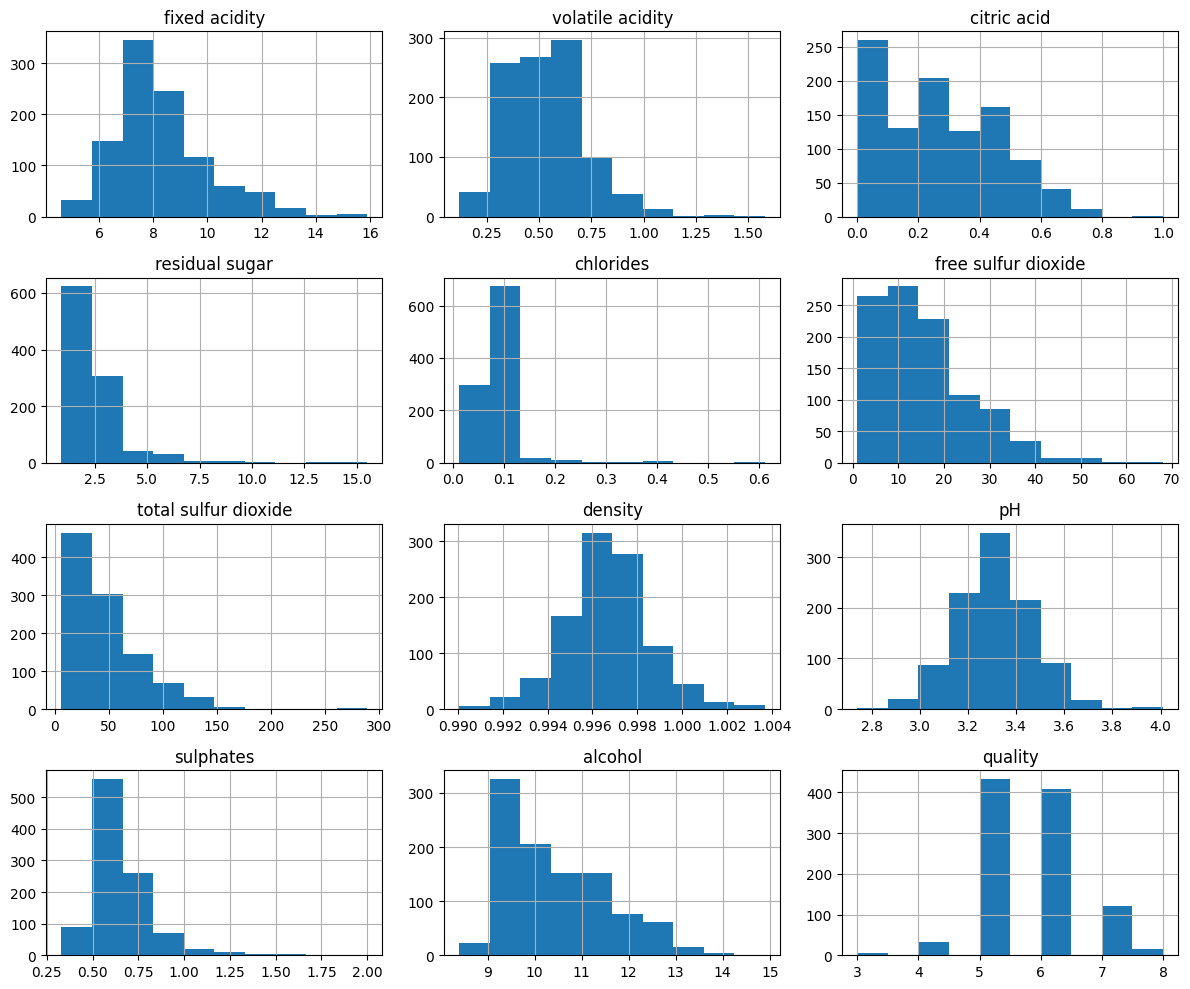

In [13]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## Checking Outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x29cc70c6e10>,
 'caps': [<matplotlib.lines.Line2D at 0x29cc70c7380>,
 'boxes': [<matplotlib.lines.Line2D at 0x29cc67a0410>,
 'medians': [<matplotlib.lines.Line2D at 0x29cc70c79e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29cc70c7c80>,
 'means': []}

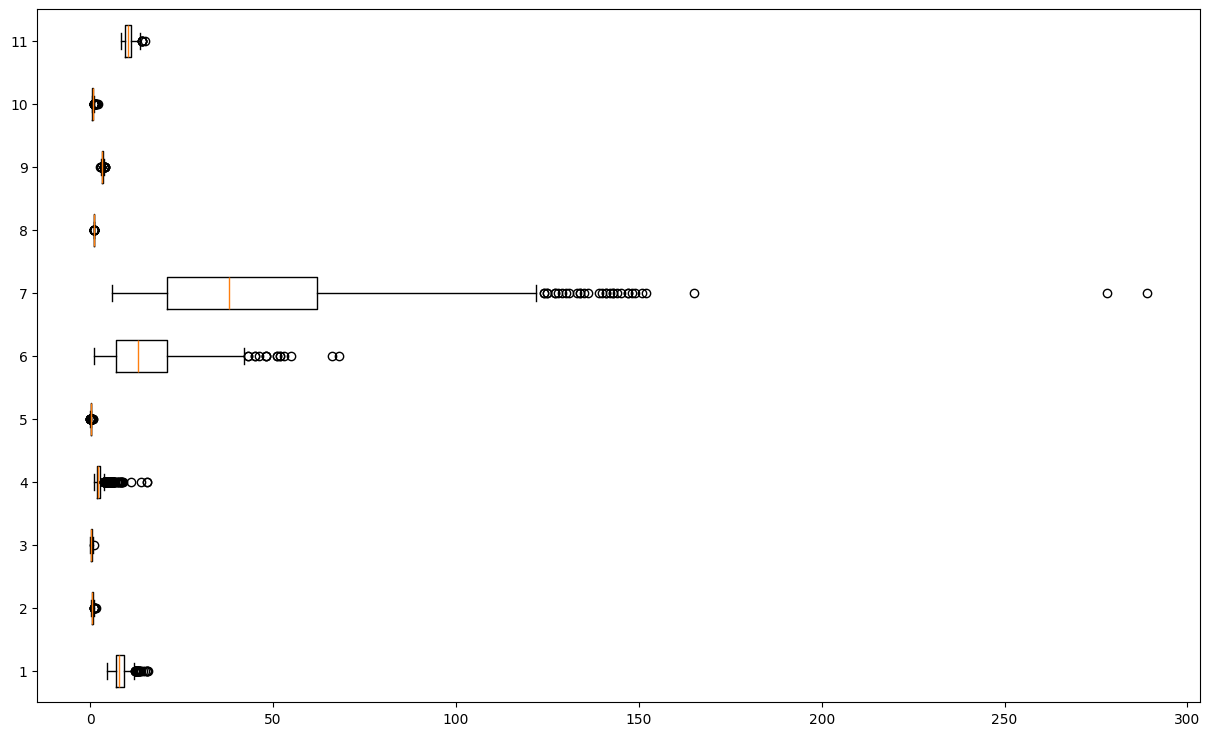

In [14]:
plt.figure(figsize=(15,9))
plt.boxplot(df.iloc[:,0:11], vert=False)

## Outlier Romoving With IQR method AND Mean Imputation

In [15]:
def remove_outliers_iqr_mean_impute(df, columns):

    # Copy the dataframe to avoid changing the original data
    df_clean = df.copy()
    
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bound
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = (df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)
        
        # Calculate the mean of the column
        mean_value = df_clean[column][~outliers].mean()
        
        # Replace outliers with the mean value
        df_clean.loc[outliers, column] = mean_value
        
    return df_clean

In [16]:
df1=df.copy()

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
df.iloc[:,0:11]=remove_outliers_iqr_mean_impute(df.iloc[:,0:11], df.iloc[:,0:11].columns)


{'whiskers': [<matplotlib.lines.Line2D at 0x29cc615a450>,
 'caps': [<matplotlib.lines.Line2D at 0x29cc615a9f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29cc6135460>,
 'medians': [<matplotlib.lines.Line2D at 0x29cc615afc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x29cc615b2c0>,
 'means': []}

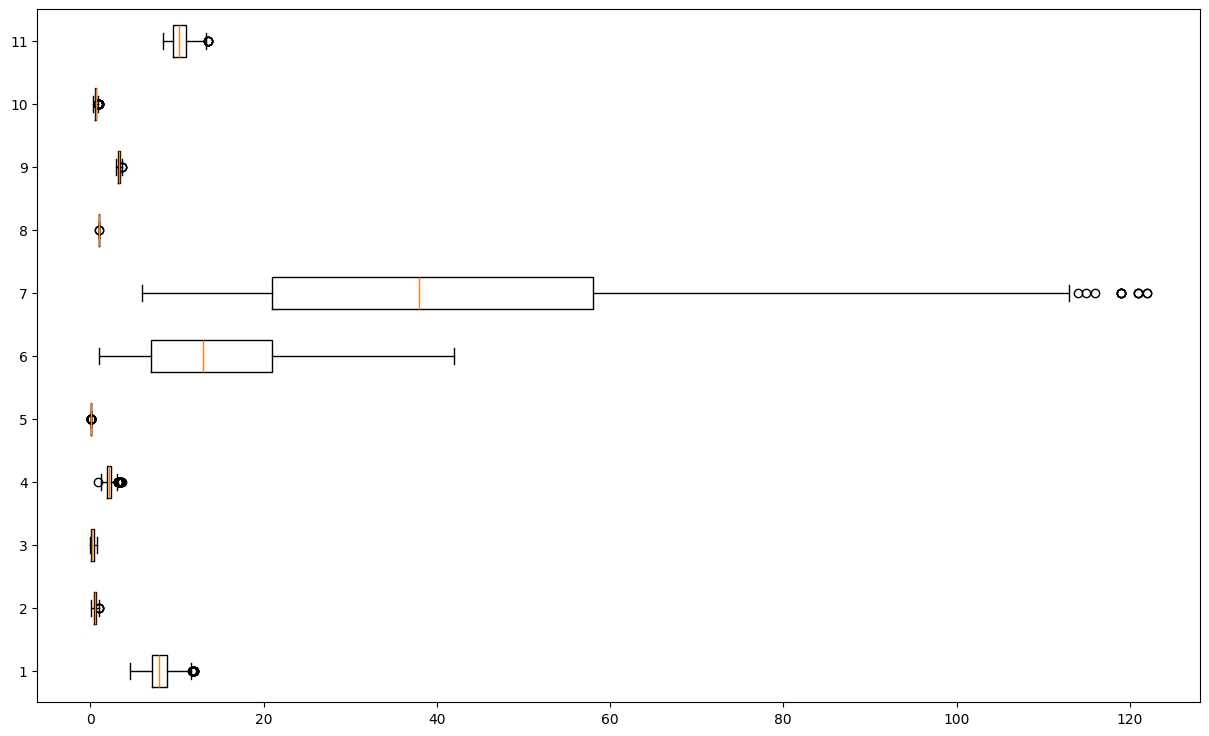

In [19]:
plt.figure(figsize=(15,9))
plt.boxplot(df.iloc[:,0:11], vert=False)

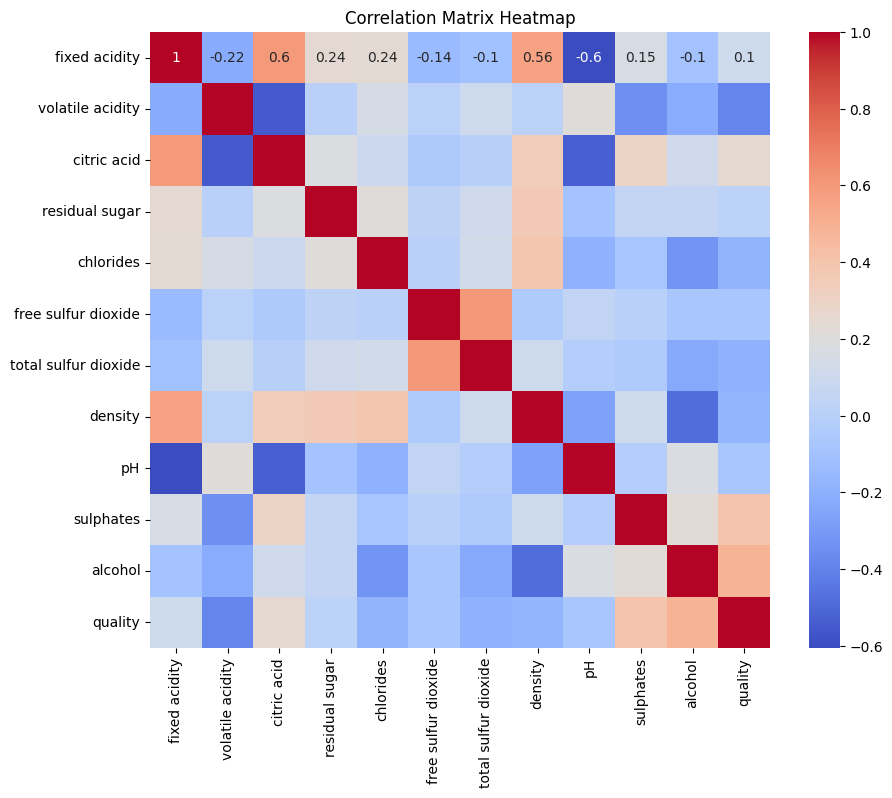

In [20]:
# 3. Correlation matrix heatmap
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Checking Validation before data preprocessing

In [21]:
X = df.drop('quality', axis=1)  # Independent variables
y = df['quality']  # Dependent variable

In [22]:
#  Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

LR: 0.560949 (0.058843)
LDA: 0.589468 (0.047571)
KNN: 0.463735 (0.061517)
CART: 0.468521 (0.056578)
NB: 0.563832 (0.040634)
SVM: 0.466589 (0.034950)


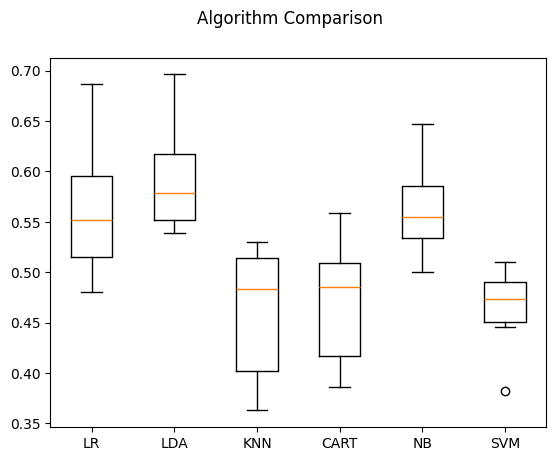

In [25]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

AB: 0.504960 (0.081999)
GBM: 0.558940 (0.056506)
RF: 0.581567 (0.054348)
ET: 0.589420 (0.041251)


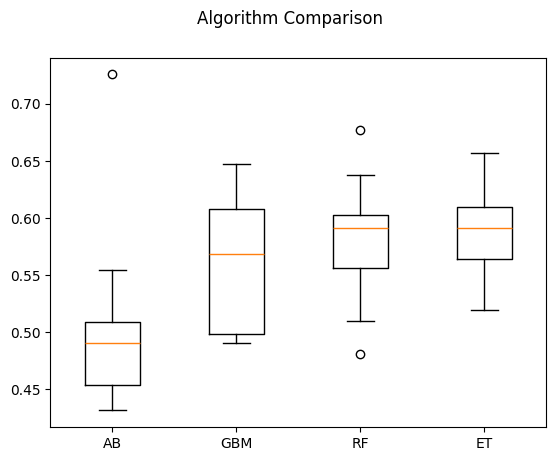

In [26]:
# ensembles
num_folds = 10
scoring = 'accuracy'
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show() 

# Data Preprocessing

In [27]:
df['quality'].value_counts()

quality
5    433
6    409
7    122
4     33
8     15
3      6
Name: count, dtype: int64

##### Here we see that the classification information of the target variable is imbalanced, which may lead to prediction bias.

# Standardizing the data

In [28]:
#Step: standardized data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Dealing With Imbalace Using- Synthetic Minority Oversampling Technique.(SMOTE)

In [29]:
#Step 1:Dealing With Imbalace Using- Synthetic Minority Oversampling Technique.(SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [30]:
print(f"Outcome class size before SMOTE: {y.value_counts()}")
print(f"Outcome class size before SMOTE: {y_resampled.value_counts()}")

Outcome class size before SMOTE: quality
5    433
6    409
7    122
4     33
8     15
3      6
Name: count, dtype: int64
Outcome class size before SMOTE: quality
5    433
6    433
7    433
4    433
8    433
3    433
Name: count, dtype: int64


In [31]:
#  Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Checking Validation after data preprocessing

In [32]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

LR: 0.404240 (0.156739)
LDA: 0.385321 (0.162274)
KNN: 0.737300 (0.266701)
CART: 0.686037 (0.192815)
NB: 0.491348 (0.186070)
SVM: 0.712282 (0.210998)


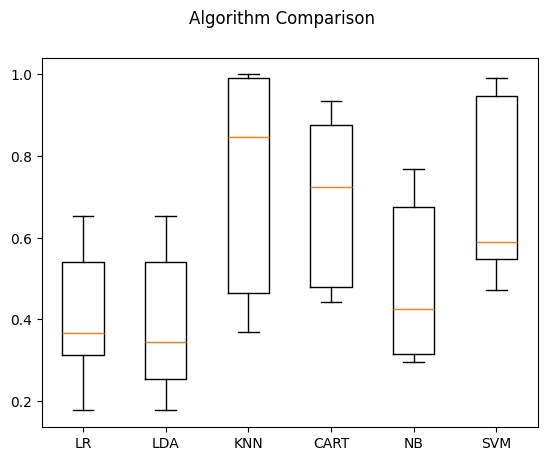

In [33]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model,X_resampled, y_resampled, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

AB: 0.087055 (0.112192)
GBM: 0.738767 (0.176784)
RF: 0.793819 (0.183088)
ET: 0.816899 (0.174225)


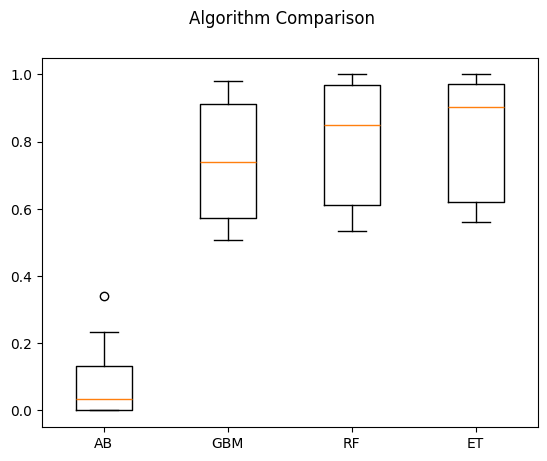

In [34]:
# ensembles
num_folds = 10
scoring = 'accuracy'
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()    

# Validation Score without scaler
#### ExtraTreesClassifier: 0.598282 
#### LinearDiscriminantAnalysis: 0.589468 
#### RandomForestClassifier: 0.579625
# Validation Score with scaler and using over sampling method
#### ExtraTreesClassifier: 0.818833 
#### RandomForestClassifier: 0.784978 
#### KNeighborsClassifier: 0.737300 

# Fit The Model Extra Tree Classifier

In [55]:
## Fitting the Extra Tree Classifier Algorithme.

model=ExtraTreesClassifier(n_estimators=100)
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [56]:
# estimate accuracy on validation dataset
predictions = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, predictions)*100)

Accuracy : 85.76923076923076


In [37]:
conf_matrix =confusion_matrix(y_test, predictions)
# plt.figure(figsize = (8, 6))
# sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()
conf_matrix

array([[93,  0,  0,  0,  0,  0],
       [ 0, 86,  0,  0,  0,  0],
       [ 1,  5, 57, 19,  4,  0],
       [ 0,  4, 30, 49,  6,  2],
       [ 0,  0,  0,  5, 77,  0],
       [ 0,  0,  0,  0,  1, 81]], dtype=int64)

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99        93
           4       0.91      1.00      0.95        86
           5       0.66      0.66      0.66        86
           6       0.67      0.54      0.60        91
           7       0.88      0.94      0.91        82
           8       0.98      0.99      0.98        82

    accuracy                           0.85       520
   macro avg       0.85      0.85      0.85       520
weighted avg       0.84      0.85      0.85       520



In [39]:
new_data = np.array([[6.9, 0.5,0.04,1.5,0.085,19.0,49.0,0.9958,3.35,0.78,9.5]])
new_predictions = model.predict(new_data)
print("Predictions for new data: ", new_predictions)

Predictions for new data:  [6]


In [40]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False, True]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

In [60]:
 grid_search.fit(X_train, y_train)

#Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best parameters found:  {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score:  0.8633291527313267


In [64]:
## Fitting the Extra Tree Classifier Algorithme.

model=ExtraTreesClassifier(bootstrap=False, max_depth= None, max_features='sqrt', n_estimators= 200)
model.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=200)

In [65]:
# estimate accuracy on validation dataset
predictions = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, predictions)*100)

Accuracy : 86.15384615384616


In [45]:
conf_matrix

array([[93,  0,  0,  0,  0,  0],
       [ 0, 86,  0,  0,  0,  0],
       [ 1,  5, 57, 19,  4,  0],
       [ 0,  4, 30, 49,  6,  2],
       [ 0,  0,  0,  5, 77,  0],
       [ 0,  0,  0,  0,  1, 81]], dtype=int64)

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99        93
           4       0.90      1.00      0.95        86
           5       0.65      0.63      0.64        86
           6       0.67      0.56      0.61        91
           7       0.89      0.95      0.92        82
           8       0.98      0.99      0.98        82

    accuracy                           0.85       520
   macro avg       0.84      0.85      0.85       520
weighted avg       0.84      0.85      0.85       520



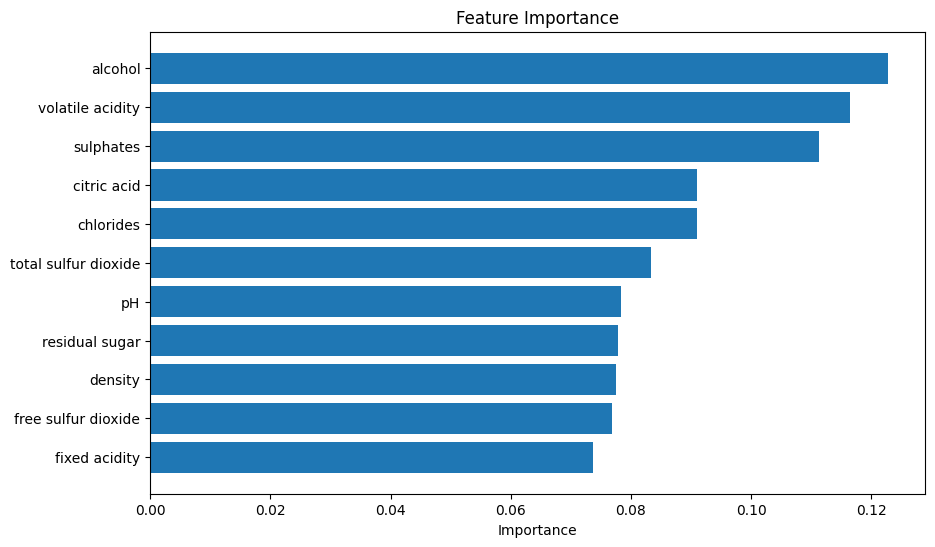

In [47]:
feature_importance_values = model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance_values})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

# Linear Model

In [66]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Step 5: Create a Linear Regression model and fit the model on the training data
reg_model = Ridge(alpha=1.0)
reg_model.fit(X_train, y_train)

Ridge()

In [67]:

# Step 6: Make predictions on the test data
y_pred = reg_model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 8: Print the evaluation results
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.8269
R-squared: 0.7160
